In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [35]:


fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")



In [36]:


fake.shape



(23481, 4)

In [37]:


# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'



In [38]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [39]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [40]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [41]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [42]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [43]:


# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)



In [44]:
data.head()

,title,text,subject,date,target
0,The Battle against Islamic State,(Reuters) - It was an awkward coalition riven ...,worldnews,"December 4, 2017",true
1,Kenya's Odinga pulled out of election to avoid...,NAIROBI (Reuters) - Kenya s opposition leader ...,worldnews,"October 17, 2017",true
2,“BLOOD ON THEIR HANDS” FOR VOTING RIGHTS: The ...,It s time to stop hitting the snooze button Am...,Government News,"Aug 9, 2015",fake
3,Drunken Cop Arrested After Holding Fast Food ...,New released video shows Santa Clara County sh...,News,"July 24, 2016",fake
4,MEXICAN ILLEGAL ALIEN DEPORTED 19 Times Arrest...,BUILD THAT WALL [ ] And when Mexico sends its ...,left-news,"Dec 30, 2016",fake


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [46]:


# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()



,title,text,subject,target
0,The Battle against Islamic State,(Reuters) - It was an awkward coalition riven ...,worldnews,true
1,Kenya's Odinga pulled out of election to avoid...,NAIROBI (Reuters) - Kenya s opposition leader ...,worldnews,true
2,“BLOOD ON THEIR HANDS” FOR VOTING RIGHTS: The ...,It s time to stop hitting the snooze button Am...,Government News,fake
3,Drunken Cop Arrested After Holding Fast Food ...,New released video shows Santa Clara County sh...,News,fake
4,MEXICAN ILLEGAL ALIEN DEPORTED 19 Times Arrest...,BUILD THAT WALL [ ] And when Mexico sends its ...,left-news,fake


In [47]:


# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()



,text,subject,target
0,(Reuters) - It was an awkward coalition riven ...,worldnews,true
1,NAIROBI (Reuters) - Kenya s opposition leader ...,worldnews,true
2,It s time to stop hitting the snooze button Am...,Government News,fake
3,New released video shows Santa Clara County sh...,News,fake
4,BUILD THAT WALL [ ] And when Mexico sends its ...,left-news,fake


In [48]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,(reuters) - it was an awkward coalition riven ...,worldnews,true
1,nairobi (reuters) - kenya s opposition leader ...,worldnews,true
2,it s time to stop hitting the snooze button am...,Government News,fake
3,new released video shows santa clara county sh...,News,fake
4,build that wall [ ] and when mexico sends its ...,left-news,fake


In [49]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [50]:
data.head()

,text,subject,target
0,reuters it was an awkward coalition riven by ...,worldnews,true
1,nairobi reuters kenya s opposition leader rai...,worldnews,true
2,it s time to stop hitting the snooze button am...,Government News,fake
3,new released video shows santa clara county sh...,News,fake
4,build that wall and when mexico sends its pe...,left-news,fake


In [51]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split()]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\indivar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


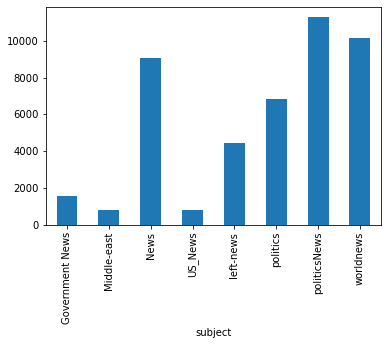

In [52]:


# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()



target
fake    23481
true    21417
Name: text, dtype: int64


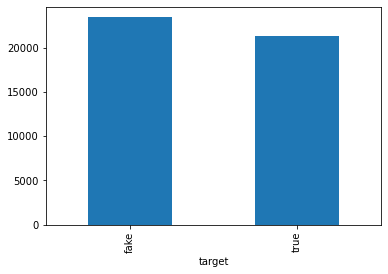

In [53]:


# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()



In [54]:

!pip install wordcloud



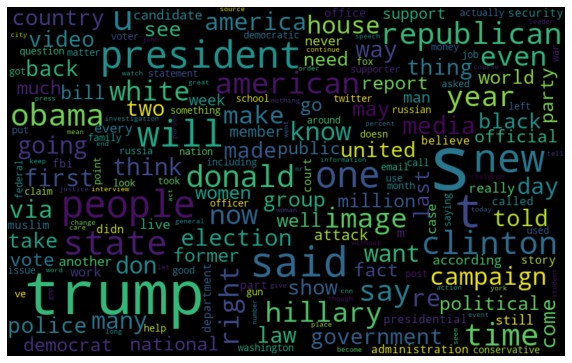

In [55]:


# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



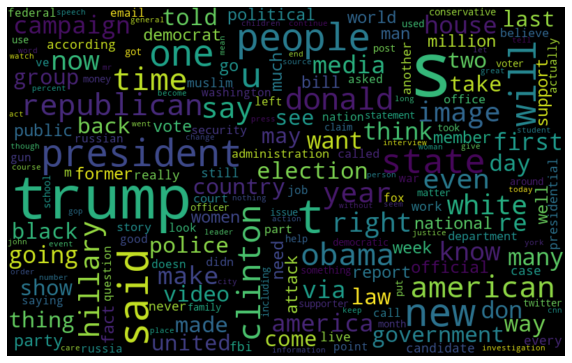

In [56]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

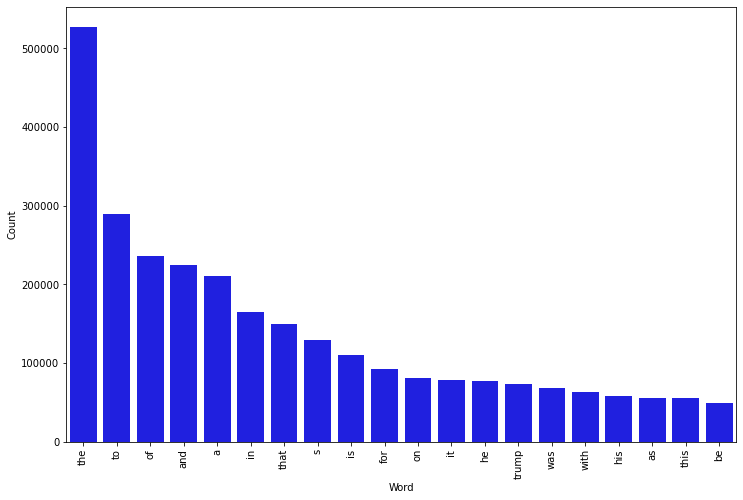

In [58]:
import nltk

# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)



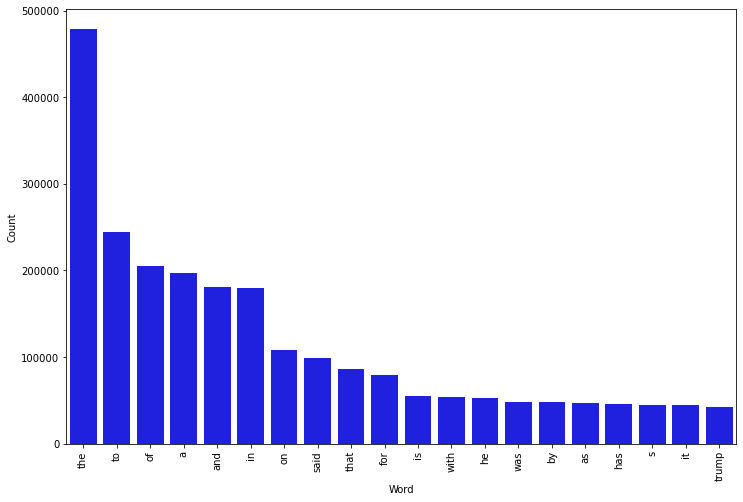

In [59]:
counter(data[data["target"] == "true"], "text", 20)

In [60]:


# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [61]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [62]:
X_train.head()

36335    reuters a california deputy attorney general h...
12384    as a college student i know firsthand how quic...
24419    hillary clinton has turned down repeated reque...
24740    washington reuters democratic vice presidentia...
27039    washington reuters democrat hillary clinton ac...
Name: text, dtype: object

In [63]:


y_train.head()



36335    true
12384    fake
24419    fake
24740    true
27039    true
Name: target, dtype: object

In [64]:


from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))



accuracy: 99.52%


Confusion matrix, without normalization


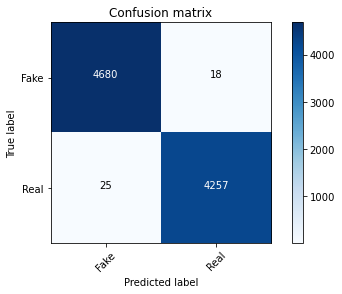

In [65]:


cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

